In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Data/Processed/crimes_clear.csv")

In [3]:
df.dtypes

arma            object
departamento    object
municipio       object
fecha           object
genero          object
grupo_etario    object
codigo_dane      int64
cantidad         int64
delito          object
dtype: object

# Univariable Analisys 

## Arma Univariable

In [16]:
# more common values
df["arma"].value_counts()

SIN EMPLEO DE ARMAS                   158609
ARMA DE FUEGO                          43141
CONTUNDENTES                           35462
ARMA BLANCA / CORTOPUNZANTE            24828
VEHICULO                                7455
NO REPORTADO                            7270
PALANCAS                                4163
MOTO                                    3801
LLAVE MAESTRA                           3329
LLAMADA TELEFONICA                      2566
DIRECTA                                 1555
ESCOPOLAMINA                            1446
REDES SOCIALES                           869
CARTA EXTORSIVA                          379
ARMA TRAUMATICA                          248
ALIMENTOS VENCIDOS                       211
BICICLETA                                157
ARTEFACTO EXPLOSIVO/CARGA DINAMITA       145
PERRO                                     56
COMBUSTIBLE                               41
MIXTA                                     37
GRANADA DE MANO                           21
AGUA CALIE

<AxesSubplot:>

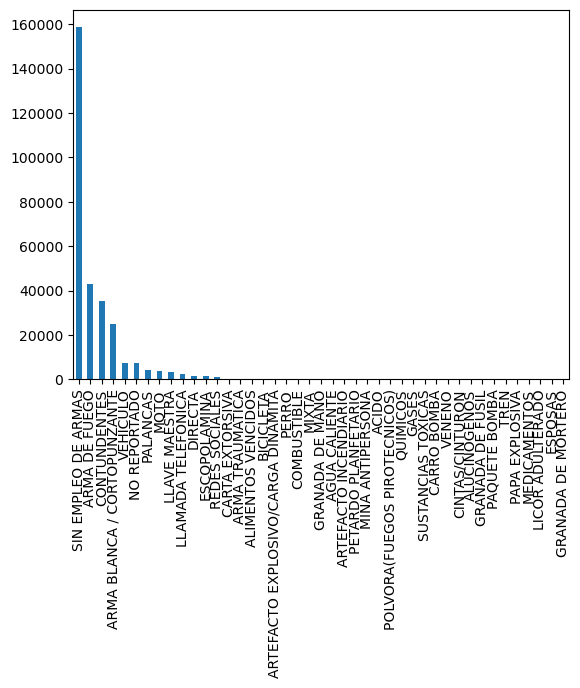

In [5]:
# more common values ordered
df["arma"].value_counts().sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:>

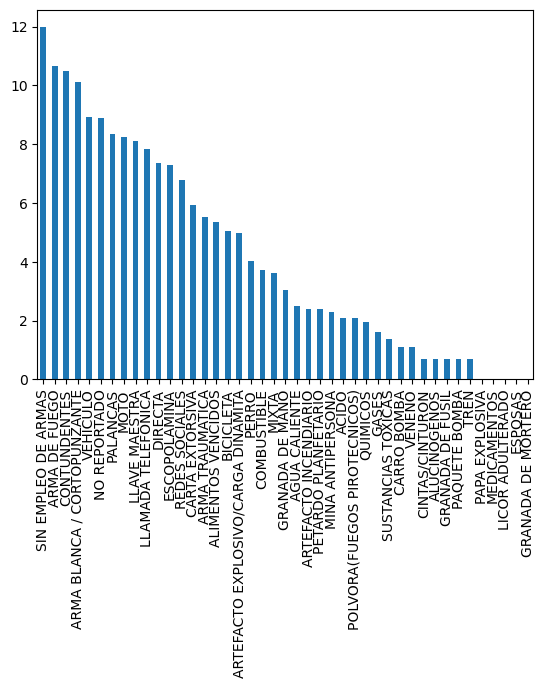

In [6]:
# more common values normalized
np.log(df["arma"].value_counts().sort_values(ascending=False)).plot(kind="bar")

## Place (municipio, departamento) Univariable Analysis

In [7]:
# Which places reports more crimes
df["municipio"].value_counts()

Bogotá D.C. (CT)     18903
Medellín (CT)        10963
Cali (CT)            10502
Barranquilla (CT)     6946
Cartagena (CT)        6243
                     ...  
Sácama                   1
Abriaquí                 1
Macaravita               1
La Salina                1
Jordán                   1
Name: municipio, Length: 1023, dtype: int64

In [8]:
# Which places reports more crimes
df["departamento"].value_counts()

CUNDINAMARCA          48133
ANTIOQUIA             36919
VALLE                 29230
SANTANDER             17318
ATLÁNTICO             14068
TOLIMA                12748
HUILA                 11320
BOLÍVAR               10911
META                  10545
CAUCA                 10530
BOYACÁ                10457
NARIÑO                10020
NORTE DE SANTANDER     9286
CESAR                  8994
MAGDALENA              7868
RISARALDA              7211
CÓRDOBA                6503
CALDAS                 5446
QUINDÍO                5023
SUCRE                  4648
GUAJIRA                3962
CASANARE               3486
CAQUETÁ                2556
CHOCÓ                  2486
PUTUMAYO               2151
ARAUCA                 1359
GUAVIARE                870
SAN ANDRÉS              748
AMAZONAS                353
VICHADA                 342
GUAINÍA                 237
VAUPÉS                  157
-                         1
Name: departamento, dtype: int64

<AxesSubplot:>

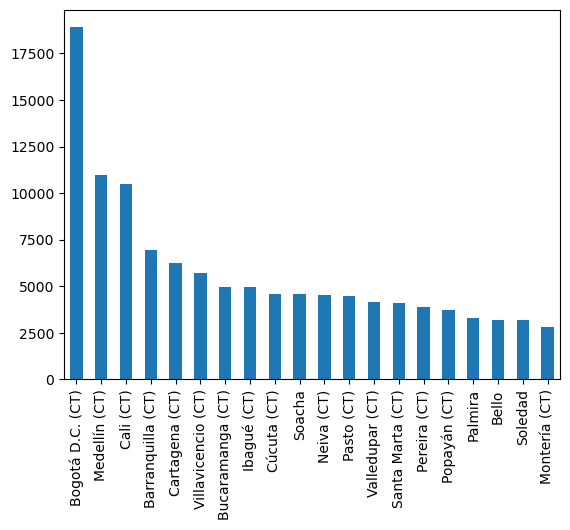

In [22]:
df["municipio"].value_counts().head(20).plot(kind="bar")

<AxesSubplot:>

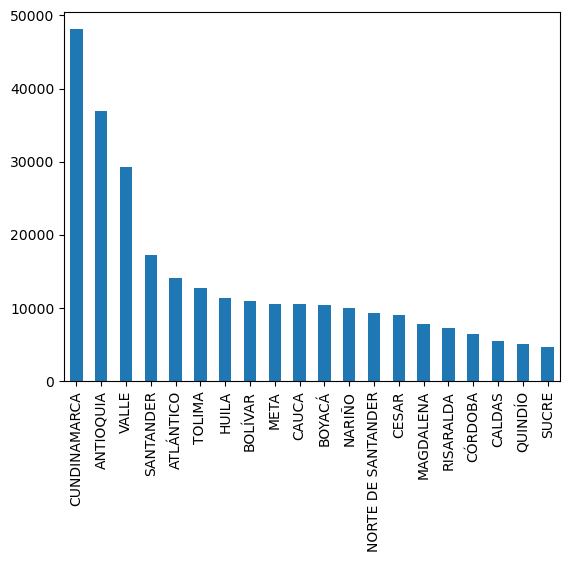

In [23]:
df["departamento"].value_counts().head(20).plot(kind="bar")

## Date (fecha) Univariable Analysis

In [9]:
# convert to datetime the variable
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y-%m-%d")

In [10]:
# Days with more denunces
df["fecha"].value_counts()

2023-01-01    1965
2023-05-07    1502
2023-03-19    1497
2023-07-01    1490
2023-01-22    1454
              ... 
2022-01-04      17
2022-08-04      17
2022-04-16      17
2022-08-18      16
2022-01-12      15
Name: fecha, Length: 608, dtype: int64

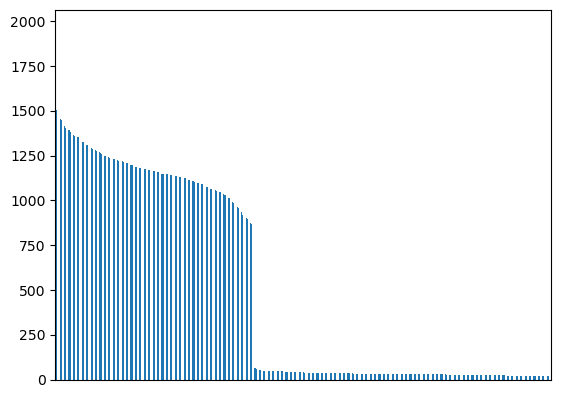

In [28]:
df["fecha"].value_counts().plot(kind="bar")
plt.xticks([])
plt.show()

NOTE:

The days with more crimes reported are Sundays

## Genre (genero) Univariable Analysis

In [11]:
df["genero"].value_counts()

MASCULINO       146608
FEMENINO        113226
NO REPORTADO     36052
Name: genero, dtype: int64

<AxesSubplot:>

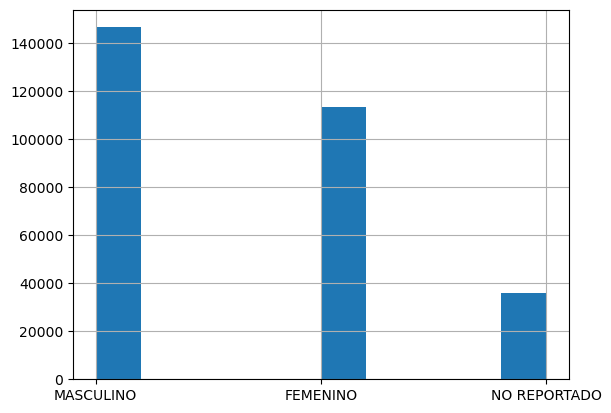

In [29]:
df["genero"].hist()

## Age (grupo_etario) Univariable Analysis

In [13]:
df["grupo_etario"].value_counts()

ADULTOS         230768
NO REPORTADO     36052
ADOLESCENTES     17559
MENORES          11507
Name: grupo_etario, dtype: int64

<AxesSubplot:>

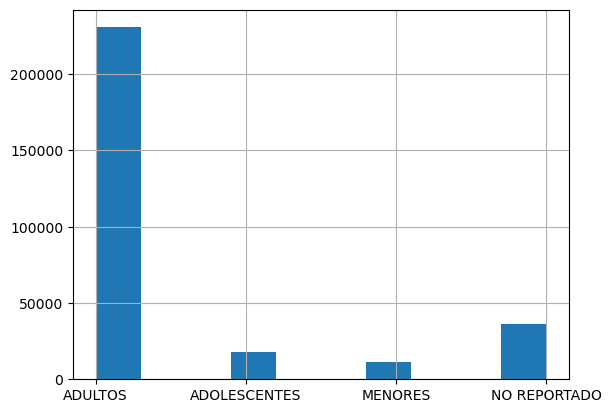

In [30]:
df["grupo_etario"].hist()

## Crime (delito) Univariable Analysis

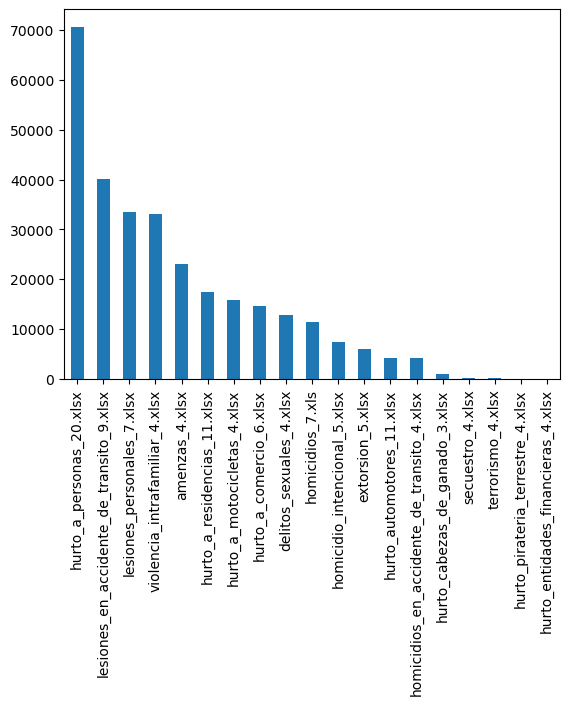

In [15]:
df["delito"].value_counts().plot(kind="bar")
plt.xticks(rotation='vertical')
plt.show()

# Multivariable Analisys

## Arma

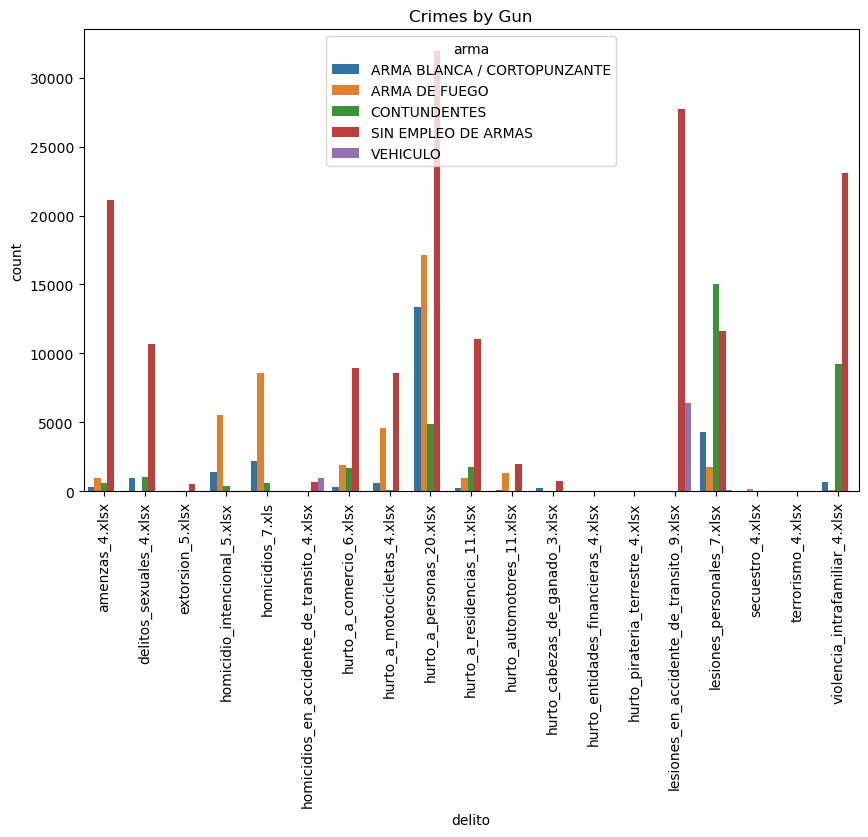

In [68]:
# Make a list with the 5 more common guns 
top_arma = list(df["arma"].value_counts().head(5).index)

# Dataframe with only the more common guns
df_top_delitos = df[df['arma'].isin(top_arma)]

plt.figure(figsize=(10,6))
sns.countplot(data=df_top_delitos, x='delito', hue="arma")
plt.title('Crimes by Gun')
plt.xticks(rotation=90)
plt.show()

## Place

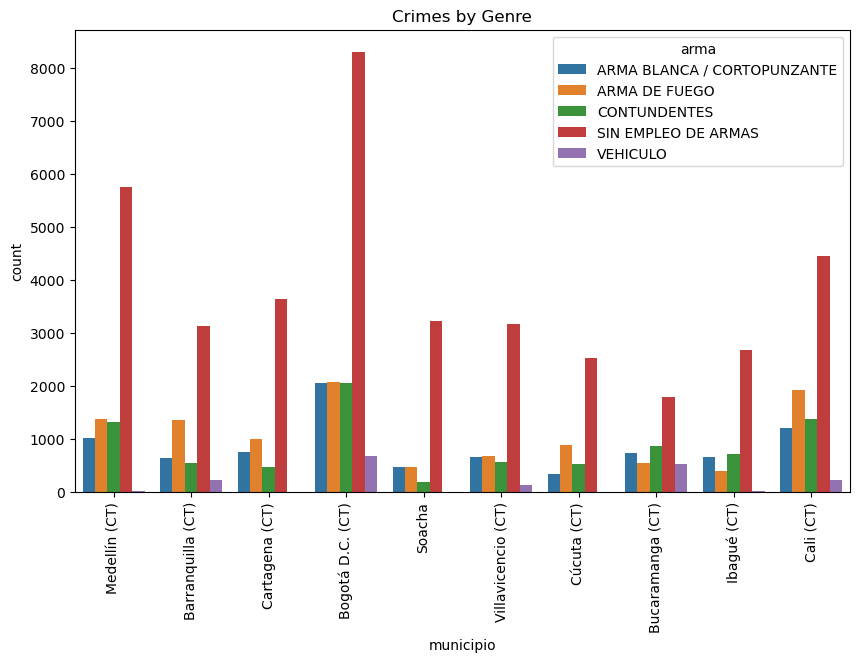

In [74]:
top_municipio = list(df["municipio"].value_counts().head(10).index)
df_municipio = df[(df["municipio"].isin(top_municipio)) & (df["arma"].isin(top_arma))]

plt.figure(figsize=(10,6))

sns.countplot(data=df_municipio, x="municipio", hue="arma")
plt.title('Crimes by Genre')
plt.xticks(rotation=90)
plt.show()

## Genre

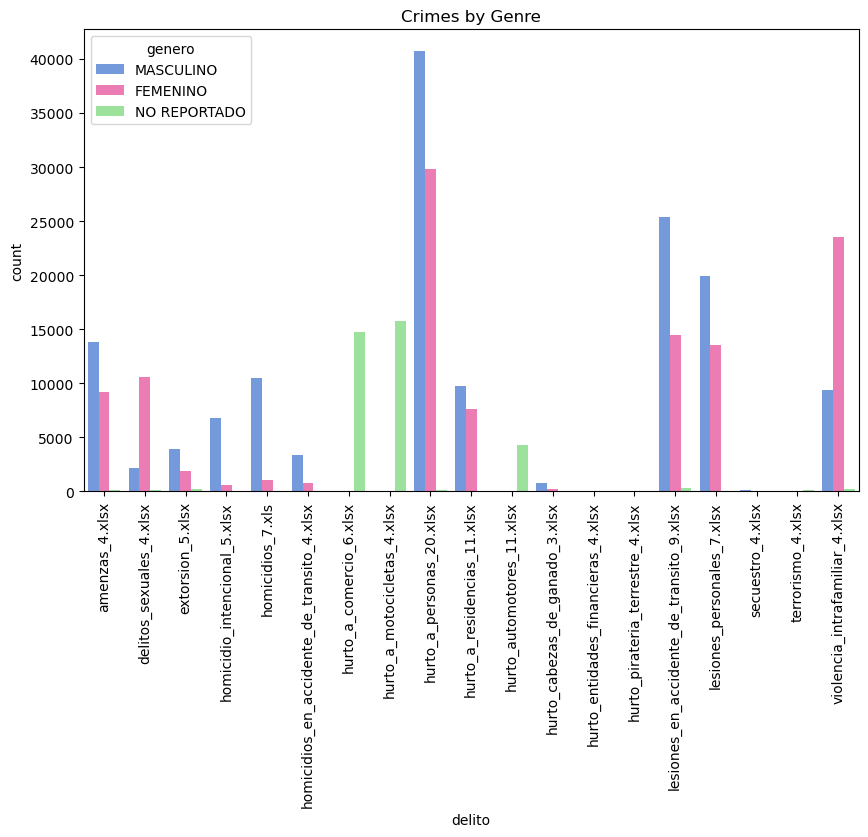

In [12]:
# Define the color palette
palette = {"MASCULINO": "cornflowerblue", "FEMENINO": "hotpink", "NO REPORTADO": "lightgreen"}

plt.figure(figsize=(10,6))
sns.countplot(data=df[["genero", "delito"]], x='delito', hue='genero', palette=palette)
plt.title('Crimes by Genre')
plt.xticks(rotation=90)
plt.show()

# Age group

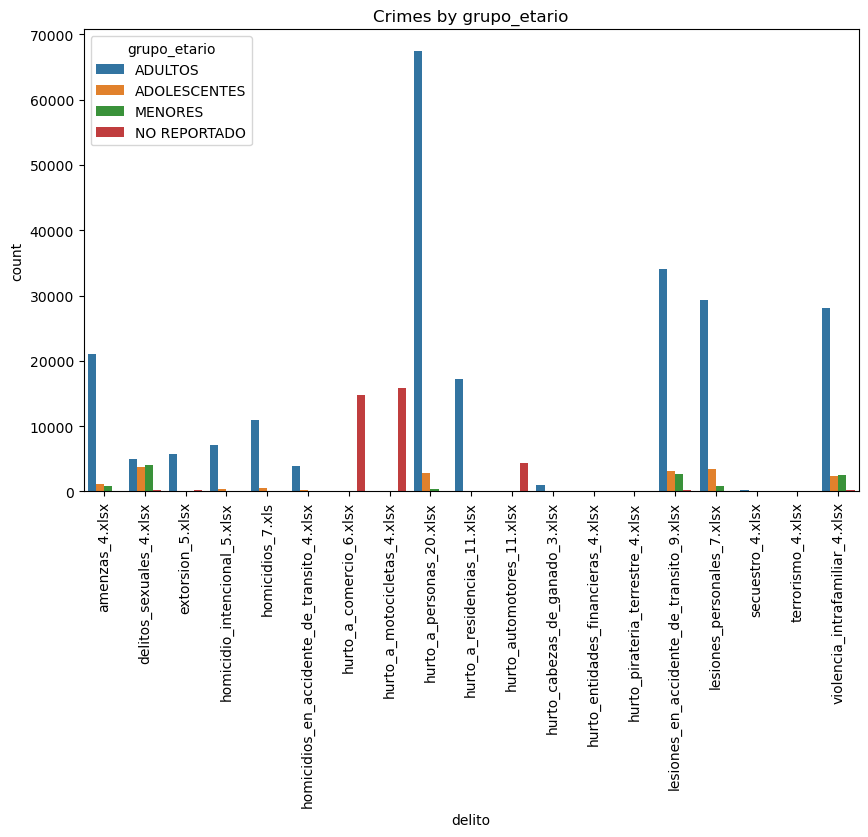

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[["grupo_etario", "delito"]], x='delito', hue='grupo_etario')
plt.title('Crimes by grupo_etario')
plt.xticks(rotation=90)
plt.show()